# LIGER bm CITE seq

## Single study normalization (Stuart et al 2019)

In [1]:
# %pip install pyliger

In [2]:
import pyliger
import anndata as ad
import scanpy as sc
import seaborn as sns
import numpy as np
import matplotlib

/home/users/allstaff/liu.ne/.conda/envs/scMultiOmics_normalization/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
/home/users/allstaff/liu.ne/.conda/envs/scMultiOmics_normalization/lib/python3.9/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.



In [3]:
ADT_data = sc.read_h5ad(filename = '/vast/scratch/users/liu.ne/bm_ADT.h5ad')
RNA_data = sc.read_h5ad(filename = '/vast/scratch/users/liu.ne/bm_RNA.h5ad')

In [4]:
print(RNA_data)

AnnData object with n_obs × n_vars = 30672 × 17009
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'lane', 'donor', 'celltype.l1', 'celltype.l2', 'RNA.weight', 'ADT.weight', 'wsnn_res.2', 'seurat_clusters', 'metafeature', 'RNA_snn_res.0.25', 'ADT_snn_res.0.25', 'nCount_SCT', 'nFeature_SCT', 'log2_libsize', 'celltype.l1_with_transfer', 'ident'
    uns: 'X_name'
    obsm: 'CCA_INTEGRATED_PCA_SCALED', 'CCA_INTEGRATED_UMAP', 'FASTMNN', 'FASTMNN_UMAP', 'HARMONY', 'HARMONY_UMAP', 'LIGER_PCA', 'MOFA', 'MOFA_UMAP', 'PCA', 'RNA.UMAP', 'RPCA_INTEGRATED_PCA', 'RPCA_INTEGRATED_UMAP', 'SPCA', 'TCCA_COMMON', 'TCCA_DISTINCT_RNA'
    layers: 'logcounts'


In [5]:
RNA_data.var.index.name = 'genes'
RNA_data.obs.index.name = 'cells'

In [6]:
# Split into batches 
batch1 = RNA_data[RNA_data.obs['donor'] == 'batch1',:]
batch1.uns['sample_name'] = 'batch1'
batch2 = RNA_data[RNA_data.obs['donor'] != 'batch1',:]
batch2.uns['sample_name'] = 'batch2'

/tmp/ipykernel_51795/169306091.py:3: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
/tmp/ipykernel_51795/169306091.py:5: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.


In [7]:
# Create liger obj
bm_liger = pyliger.create_liger(list((batch1,batch2)), remove_missing= False)

# Preprocess before running liger's iNMF
pyliger.normalize(bm_liger)
pyliger.select_genes(bm_liger)
pyliger.scale_not_center(bm_liger)

/home/users/allstaff/liu.ne/.conda/envs/scMultiOmics_normalization/lib/python3.9/site-packages/pyliger/preprocessing/_scale.py:99: RuntimeWarning: divide by zero encountered in divide


In [8]:
# Run the main liger optimization algorithm
pyliger.optimize_ALS(bm_liger, k = 30)

100%|██████████| 30/30 [03:51<00:00,  7.71s/it]


In [9]:
# Quantile normalization 
pyliger.quantile_norm(bm_liger)

In [10]:
bm_liger.adata_list

[AnnData object with n_obs × n_vars = 14468 × 999
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'lane', 'donor', 'celltype.l1', 'celltype.l2', 'RNA.weight', 'ADT.weight', 'wsnn_res.2', 'seurat_clusters', 'metafeature', 'RNA_snn_res.0.25', 'ADT_snn_res.0.25', 'nCount_SCT', 'nFeature_SCT', 'log2_libsize', 'celltype.l1_with_transfer', 'ident', 'nUMI', 'nGene', 'dataset', 'cluster'
     var: 'gene_sum', 'gene_sum_sq', 'nCell', 'norm_sum', 'norm_sum_sq', 'norm_mean', 'norm_var'
     uns: 'X_name', 'sample_name', 'var_gene_idx'
     obsm: 'CCA_INTEGRATED_PCA_SCALED', 'CCA_INTEGRATED_UMAP', 'FASTMNN', 'FASTMNN_UMAP', 'HARMONY', 'HARMONY_UMAP', 'LIGER_PCA', 'MOFA', 'MOFA_UMAP', 'PCA', 'RNA.UMAP', 'RPCA_INTEGRATED_PCA', 'RPCA_INTEGRATED_UMAP', 'SPCA', 'TCCA_COMMON', 'TCCA_DISTINCT_RNA', 'H', 'H_norm'
     varm: 'W', 'V'
     layers: 'logcounts', 'norm_data', 'scale_data',
 AnnData object with n_obs × n_vars = 16204 × 999
     obs: 'orig.ident', 'nCount_RNA'

In [11]:
# Visualization
pyliger.leiden_cluster(bm_liger, resolution=0.25)
pyliger.run_umap(bm_liger, distance = 'cosine', n_neighbors = 30, min_dist = 0.3)

/home/users/allstaff/liu.ne/.conda/envs/scMultiOmics_normalization/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.


/home/users/allstaff/liu.ne/.conda/envs/scMultiOmics_normalization/lib/python3.9/site-packages/pyliger/plotting/_dataset_cluster.py:96: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/home/users/allstaff/liu.ne/.conda/envs/scMultiOmics_normalization/lib/python3.9/site-packages/IPython/lib/pretty.py:778: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


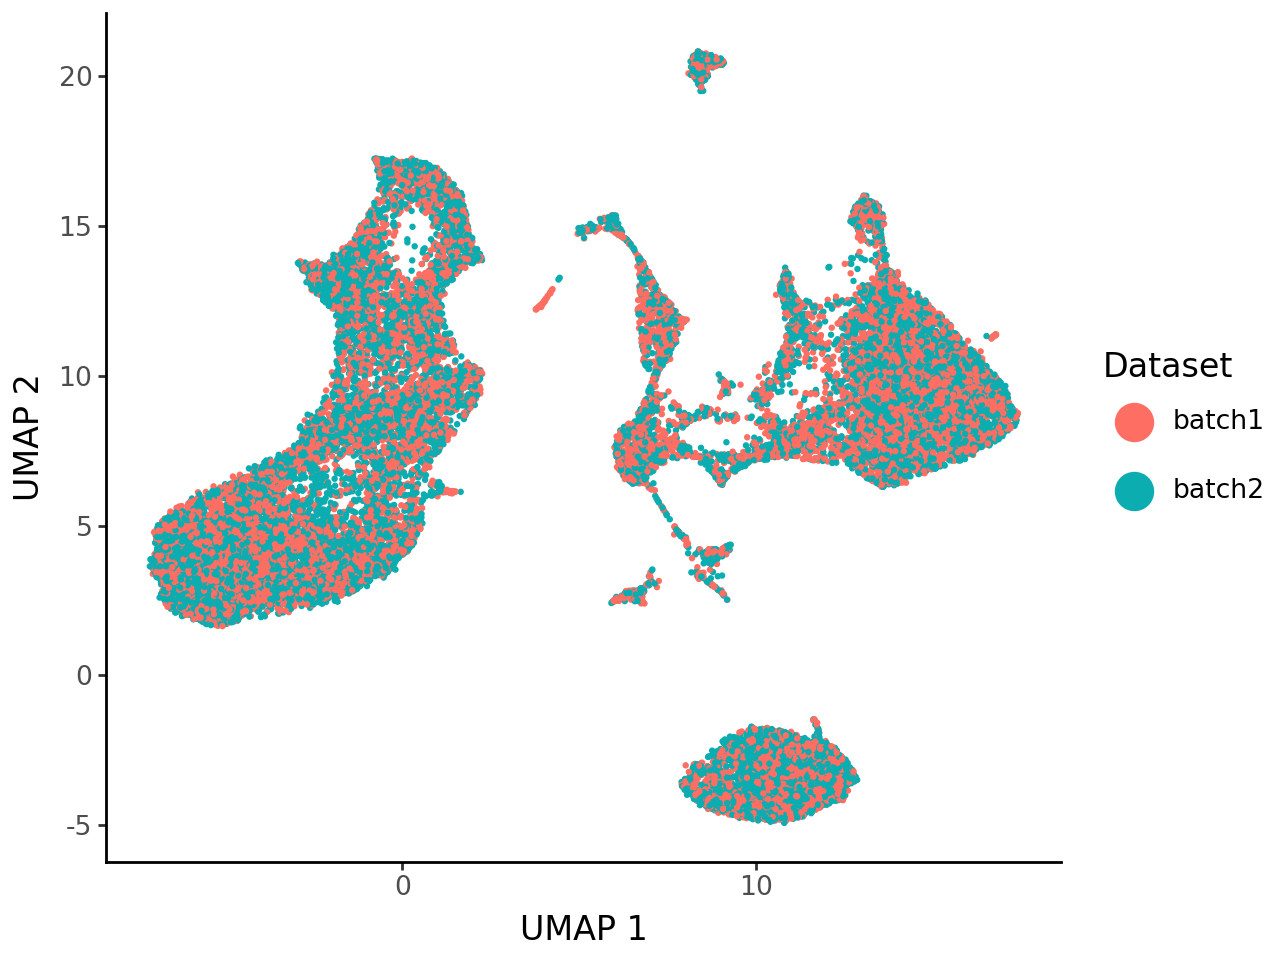

/home/users/allstaff/liu.ne/.conda/envs/scMultiOmics_normalization/lib/python3.9/site-packages/IPython/lib/pretty.py:778: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


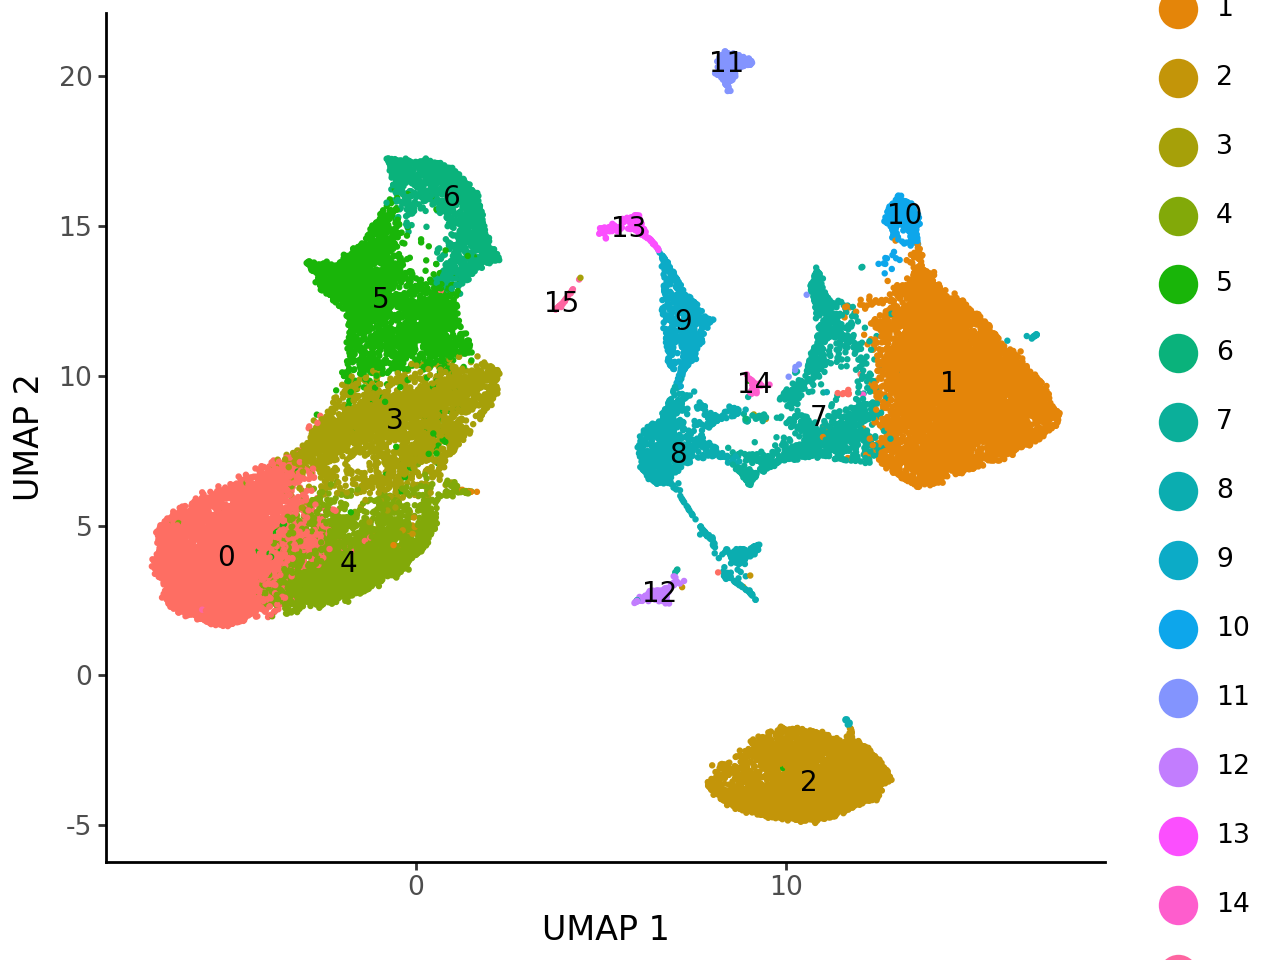

[<Figure Size: (640 x 480)>, <Figure Size: (640 x 480)>]

In [12]:
%matplotlib inline
all_plots = pyliger.plot_by_dataset_and_cluster(bm_liger, axis_labels = ['UMAP 1', 'UMAP 2'], return_plots = True)
all_plots

## Multi study normalization (integration) (Stuart et al 2019 + Triana et al 2021)

In [13]:
# Load the data
merged_ADT = sc.read_h5ad(filename = '/vast/scratch/users/liu.ne/merged_ADT.h5ad')
merged_RNA = sc.read_h5ad(filename = '/vast/scratch/users/liu.ne/merged_RNA.h5ad')

### Start with ADT normalization

In [14]:
print(merged_ADT)

AnnData object with n_obs × n_vars = 43837 × 16
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'study', 'supplied_celltype_l2', 'celltype.l1_with_transfer', 'celltype.l2_with_transfer', 'nCount_AB', 'nFeature_AB', 'percent.mt', 'nCount_BOTH', 'nFeature_BOTH', 'ClusterID', 'Batch', 'ct', 'cDC', 'B.cells', 'Myelocytes', 'Erythroid', 'Megakaryocte', 'transferred_celltype.l1', 'transferred_celltype.l2', 'log2_libsize', 'nCount_ADT', 'nFeature_ADT', 'log2_adt_libsize'
    uns: 'X_name'


In [15]:
merged_ADT.var.index.name = 'genes'
merged_ADT.obs.index.name = 'cells'
study1 = merged_ADT[merged_ADT.obs['study'] == 'Stuart_2019',:]
study1.uns['sample_name'] = 'Stuart_2019'
study2 = merged_ADT[merged_ADT.obs['study'] != 'Triana_2021',:]
study2.uns['sample_name'] = 'Triana_2021'

/tmp/ipykernel_51795/3194064694.py:4: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
/tmp/ipykernel_51795/3194064694.py:6: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.


In [16]:
# Create liger obj
multi_study_liger = pyliger.create_liger(list((study1,study2)), remove_missing= False)

# Preprocess before running liger's iNMF
pyliger.normalize(multi_study_liger)
pyliger.select_genes(multi_study_liger)
pyliger.scale_not_center(multi_study_liger)

In [17]:
# Run the main liger optimization algorithm
pyliger.optimize_ALS(multi_study_liger, k = 11)

# Quantile normalization
pyliger.quantile_norm(multi_study_liger)

100%|██████████| 30/30 [00:14<00:00,  2.05it/s]


In [18]:
# Visualization
pyliger.leiden_cluster(multi_study_liger, resolution=0.25)
pyliger.run_umap(multi_study_liger, distance = 'cosine', n_neighbors = 30, min_dist = 0.3)

/home/users/allstaff/liu.ne/.conda/envs/scMultiOmics_normalization/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.


/home/users/allstaff/liu.ne/.conda/envs/scMultiOmics_normalization/lib/python3.9/site-packages/pyliger/plotting/_dataset_cluster.py:96: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/home/users/allstaff/liu.ne/.conda/envs/scMultiOmics_normalization/lib/python3.9/site-packages/IPython/lib/pretty.py:778: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


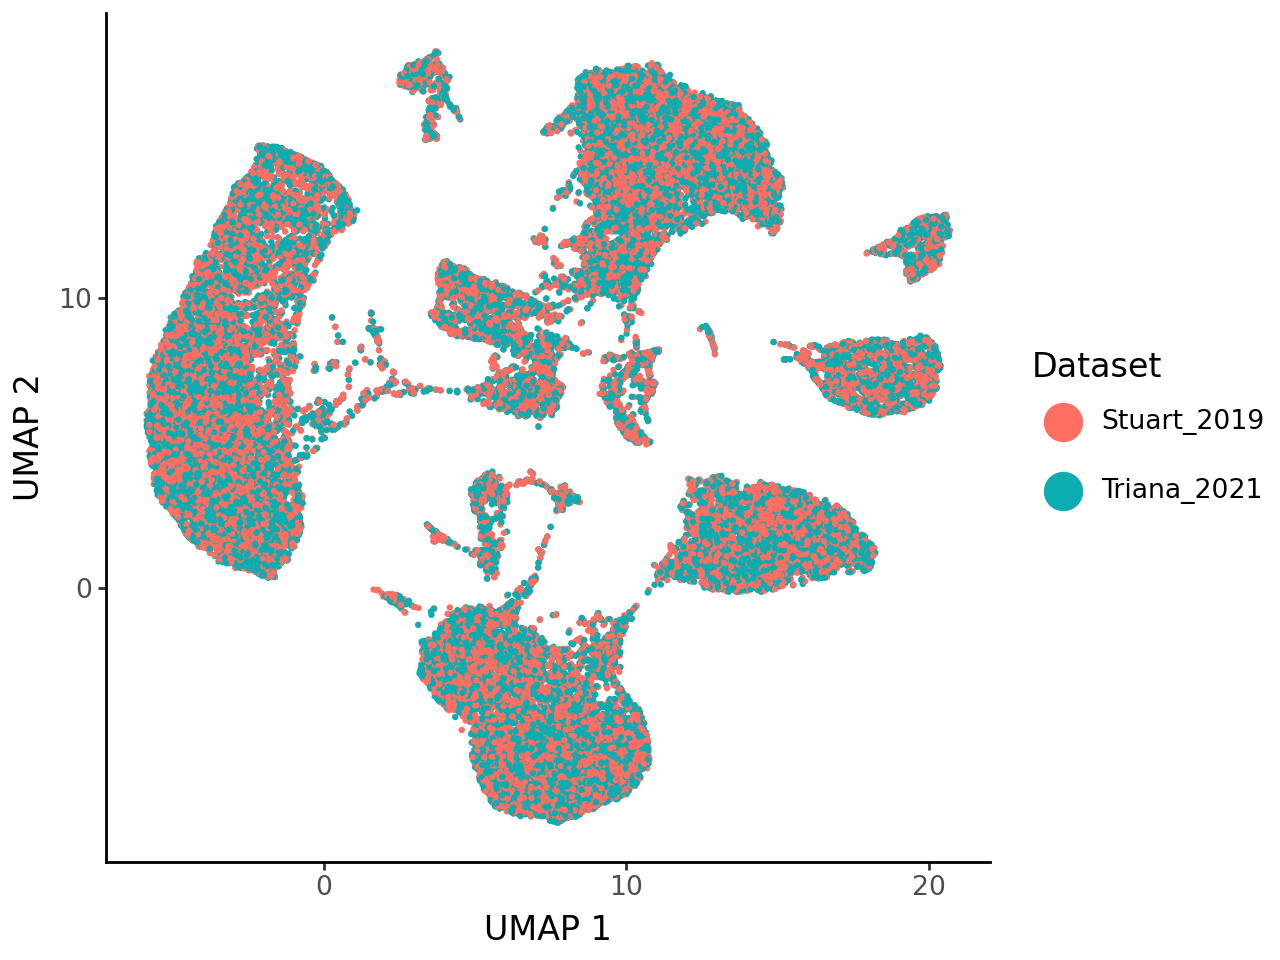

/home/users/allstaff/liu.ne/.conda/envs/scMultiOmics_normalization/lib/python3.9/site-packages/IPython/lib/pretty.py:778: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


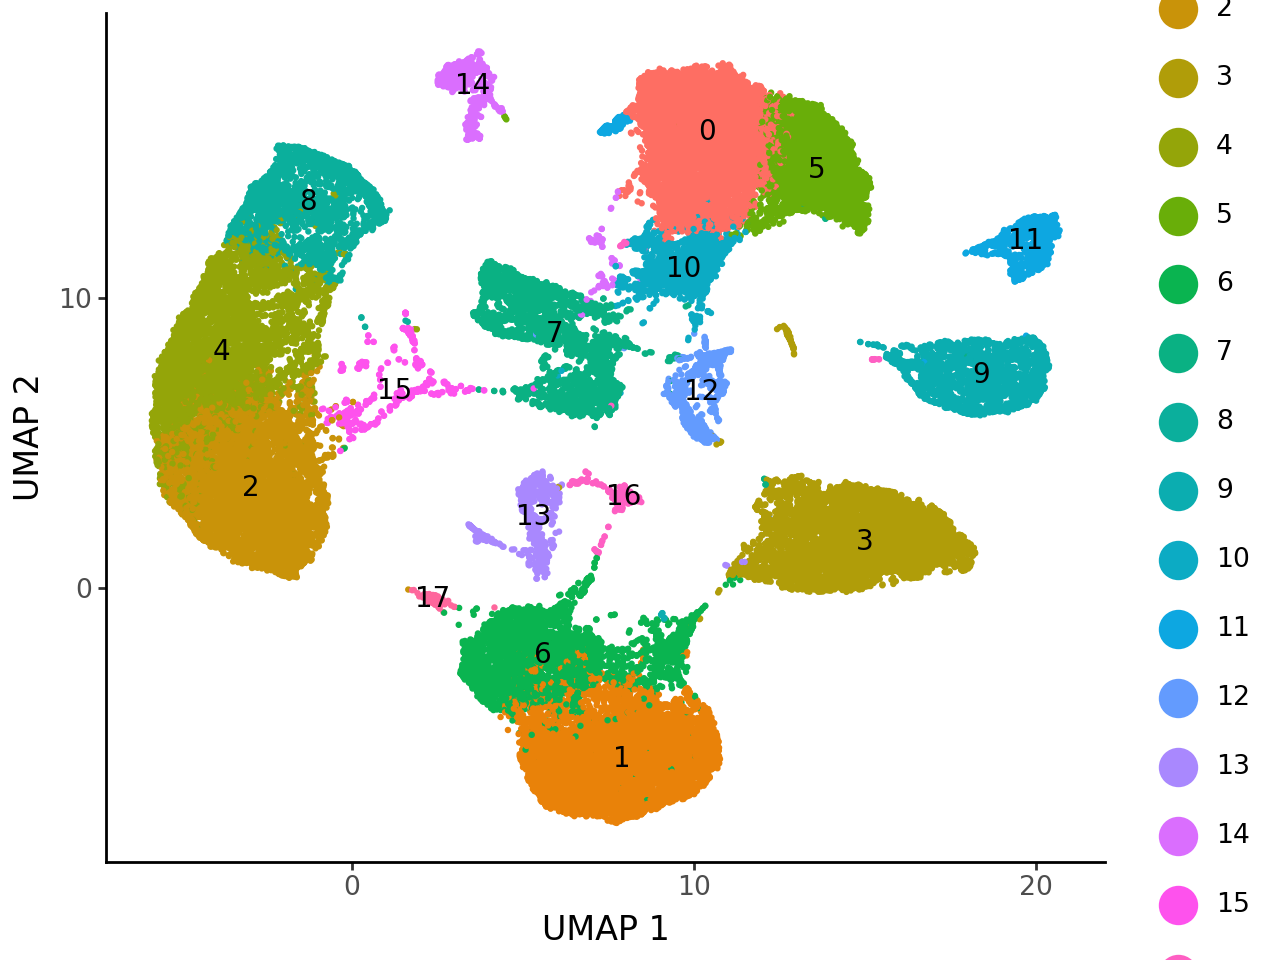

[<Figure Size: (640 x 480)>, <Figure Size: (640 x 480)>]

In [19]:
%matplotlib inline
all_plots = pyliger.plot_by_dataset_and_cluster(multi_study_liger, axis_labels = ['UMAP 1', 'UMAP 2'], return_plots = True)
all_plots

In [20]:
multi_study_liger.adata_list

[AnnData object with n_obs × n_vars = 30672 × 16
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'study', 'supplied_celltype_l2', 'celltype.l1_with_transfer', 'celltype.l2_with_transfer', 'nCount_AB', 'nFeature_AB', 'percent.mt', 'nCount_BOTH', 'nFeature_BOTH', 'ClusterID', 'Batch', 'ct', 'cDC', 'B.cells', 'Myelocytes', 'Erythroid', 'Megakaryocte', 'transferred_celltype.l1', 'transferred_celltype.l2', 'log2_libsize', 'nCount_ADT', 'nFeature_ADT', 'log2_adt_libsize', 'nUMI', 'nGene', 'dataset', 'cluster'
     var: 'gene_sum', 'gene_sum_sq', 'nCell', 'norm_sum', 'norm_sum_sq', 'norm_mean', 'norm_var'
     uns: 'X_name', 'sample_name', 'var_gene_idx'
     obsm: 'H', 'H_norm', 'umap_coords'
     varm: 'W', 'V'
     layers: 'norm_data', 'scale_data',
 AnnData object with n_obs × n_vars = 30672 × 16
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'study', 'supplied_celltype_l2', 'celltype.l1_with_transfer', 'celltype.l2_